In [1]:
import numpy as np

In [2]:
#nn with 4 inputs going to a hidden layer with 3 neurons
inputs = [[1,2,3,4], 
          [2.5,3,1,2], 
          [-1.5,5,2,3]]

weights = [[0.2,0.3,0.1,0.6],
          [0.7,0.2,-0.24,0.1],
          [0.26,-.98,0.2,0.3]]

biases = [2,3,0.5]

layer = np.dot(inputs, np.array(weights).T) + biases

In [3]:
layer

array([[ 5.5 ,  3.78,  0.6 ],
       [ 4.7 ,  5.31, -0.99],
       [ 5.2 ,  2.77, -3.49]])

In [4]:
#nn with 4 inputs -> hidden layer w/ 3 neurons -> hidden layer w/ 3 neurons
weights2 = [[0.3,-0.3,0.21],
          [0.7,0.21,-0.2],
          [0.1,-.98,0.72]]

biases2 = [5,1,2.5]

layer1 = np.dot(inputs, np.array(weights).T) + biases
layer2 = np.dot(layer1, np.array(weights2).T) + biases2
layer2

array([[ 5.642 ,  5.5238, -0.2224],
       [ 4.6091,  5.6031, -2.9466],
       [ 4.9961,  5.9197, -2.2074]])

In [5]:
#importing synthetic data
import nnfs
nnfs.init()

In [6]:
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X, y = spiral_data(samples=100, classes=3)

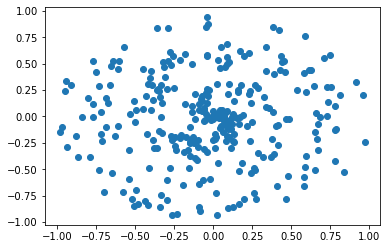

In [8]:
plt.scatter(X[:,0], X[:,1])

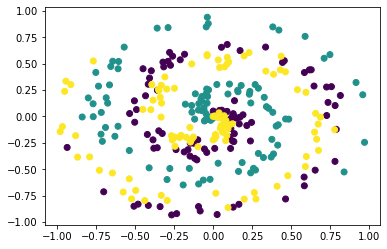

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)

In [10]:
0.01 * np.random.randn(5)

array([-0.01306527,  0.01658131, -0.00118164, -0.00680178,  0.00666383],
      dtype=float32)

In [11]:
#Creating a dense class

class Layer_Dense:
    
    #Layer initialization
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [12]:
#running the class

dense1 = Layer_Dense(2,3)
dense1.forward(X)
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 5.3124451e-05 -5.5361892e-05 -5.3239353e-05]
 [ 4.8625687e-05 -1.9669959e-04 -1.9427804e-04]
 [-1.0724009e-04 -4.0703916e-04 -4.0962288e-04]
 [-1.1640315e-04 -5.3941528e-04 -5.4189982e-04]]


In [13]:
#Defining a ReLU activation function

class Activation_ReLU:
    
    # Takes in inputs and outputs either 0 or the input if it is greater than 0
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [14]:
# No more negatives!
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense1.forward(X)
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.6800040e-05 9.3243525e-06 0.0000000e+00]
 [1.6514266e-05 6.0805462e-05 1.5202666e-05]
 [0.0000000e+00 1.4214343e-04 9.7367949e-05]
 [0.0000000e+00 2.5378630e-04 2.3917461e-04]]


In [15]:
# Defining a Softmax activation function, great for output layer as it outputs probabilities of each given class.
class Activation_Softmax:
    
    def forward(self, inputs):
        
        #Get unnormalized probabilities by exponentiating the inputs
        #We also subtract the largest number from the whole list of numbers to avoid
        #"exploding" values
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        #Normalize values
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities

In [16]:
# All of the numbers in each row add up to one.
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_Softmax()
dense1.forward(X)
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33328485 0.33336273 0.33335242]
 [0.33324254 0.33336842 0.33338907]
 [0.3331784  0.33342406 0.33339748]
 [0.33309835 0.3334548  0.33344683]]


In [17]:
#A common loss class using mean
class Loss:
        
        def calculate(self, output, y):
            
            sample_losses = self.forward(output, y)
            
            data_loss = np.mean(sample_losses)
            
            return data_loss

In [18]:
#Cross-entropy loss class
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        #Number of sample in batch
        samples = len(y_pred)
        
        #Clipping the predictions do avoid a 0 and 1
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        #Probabilities for target if categoricaly label
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        #Probabilities for target if one-hot encoded
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
            
        #The loss calculated
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods